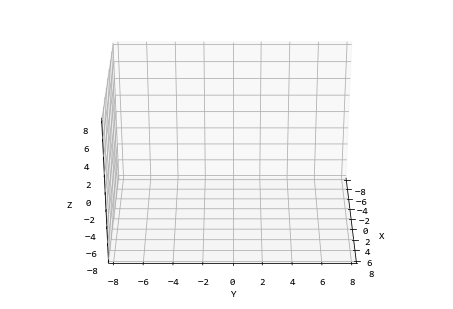

In [1]:
"""
This file is part of the pyquaternion python module

Author:         Kieran Wynn
Website:        https://github.com/KieranWynn/pyquaternion
Documentation:  http://kieranwynn.github.io/pyquaternion/

Version:         1.0.0
License:         The MIT License (MIT)

Copyright (c) 2015 Kieran Wynn

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

demo.py - Demo of pyquaternion using matplotlib

"""

%matplotlib inline 


import numpy as np

from pyquaternion import Quaternion

#import matplotlib
#matplotlib.use('TKAgg')

from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d, Axes3D
#import  matplotlib
#matplotlib.interactive(True)

from IPython.display import display, HTML

def generate_quaternion():
    q1 = Quaternion.random()
    q2 = Quaternion.random()
    while True:
        for q in Quaternion.intermediates(q1, q2, 20, include_endpoints=True):
            yield q
        #q1, q2 = q2, q1
        q1 = q2
        q2 = Quaternion.random()

quaternion_generator = generate_quaternion()

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.axis('off')

# use a different color for each axis
colors = ['r', 'g', 'b']

# set up lines and points
lines = sum([ax.plot([], [], [], c=c)
             for c in colors], [])

startpoints = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
endpoints = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# prepare the axes limits
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)


# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    return lines

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    #i = (2 * i) % x_t.shape[1]

    q = next(quaternion_generator)
    #print("q:", q)

    for line, start, end in zip(lines, startpoints, endpoints):
        #end *= 5
        start = q.rotate(start)
        end = q.rotate(end)

        line.set_data([start[0], end[0]], [start[1], end[1]])
        line.set_3d_properties([start[2], end[2]])

        #pt.set_data(x[-1:], y[-1:])
        #pt.set_3d_properties(z[-1:])

    #ax.view_init(30, 0.6 * i)
    fig.canvas.draw()
    return lines

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=False)

# Save as mp4. This requires mplayer or ffmpeg to be installed
#anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

display(HTML(anim.to_html5_video()))
#plt.show()